In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support


In [2]:
# Load and preprocess the dataset
data = pd.read_csv('updated_translation output.csv')  # Replace with the correct file name
text = data['Comments'].values
labels = data['Label'].values

In [3]:
# Encode labels as integers
labels = np.where(labels == 'hate', 1, 0)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42)

In [5]:
# Tokenize and pad the text data
max_features = 10000
max_len = 100
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=max_features, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [6]:

# Build the model architecture
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# Train the model
batch_size = 32
epochs = 20
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
122/122 [==============================] - 30s 198ms/step - loss: 0.6410 - val_loss: 0.5656
Epoch 2/20
122/122 [==============================] - 24s 195ms/step - loss: 0.4329 - val_loss: 0.5475
Epoch 3/20
122/122 [==============================] - 23s 190ms/step - loss: 0.2799 - val_loss: 0.5535
Epoch 4/20
122/122 [==============================] - 24s 192ms/step - loss: 0.1925 - val_loss: 0.6004
Epoch 5/20
122/122 [==============================] - 25s 209ms/step - loss: 0.1355 - val_loss: 0.6651
Epoch 6/20
122/122 [==============================] - 24s 196ms/step - loss: 0.0982 - val_loss: 0.7617
Epoch 7/20
122/122 [==============================] - 24s 196ms/step - loss: 0.0819 - val_loss: 0.8226
Epoch 8/20
122/122 [==============================] - 24s 195ms/step - loss: 0.0603 - val_loss: 0.8697
Epoch 9/20
122/122 [==============================] - 24s 196ms/step - loss: 0.0550 - val_loss: 0.8401
Epoch 10/20
122/122 [==============================] - 24s 195ms/step - l

In [9]:
 #Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

31/31 [==============================] - 1s 23ms/step


In [10]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7530737704918032
Precision: 0.726
Recall: 0.7773019271948608
F1 Score: 0.7507755946225438


In [12]:
report = classification_report(y_test, y_pred, target_names=['non-hate', 'hate'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    non-hate       0.78      0.73      0.76       509
        hate       0.73      0.78      0.75       467

    accuracy                           0.75       976
   macro avg       0.75      0.75      0.75       976
weighted avg       0.75      0.75      0.75       976



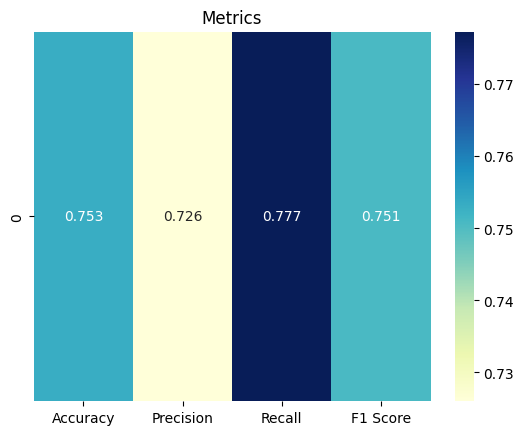

In [13]:
# Create a DataFrame for the metrics
metrics_data = {'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]}
metrics_df = pd.DataFrame(metrics_data)

# Create a heatmap for the metrics
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Metrics')
plt.show()

In [14]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()




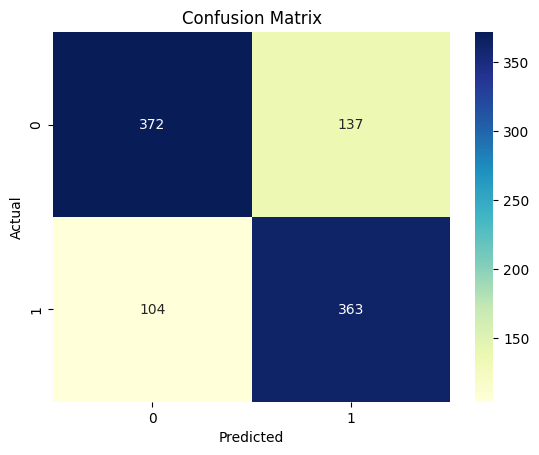

In [15]:
# Plot confusion matrix with annotations and custom color
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")  # Change the cmap parameter to your desired color scheme
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


plt.show()